# Failure at reprojecting ETRS89 / UTM zone 32N to WGS84!
I have tried everything xarray, rioxarray, to rasterio, still without any luck in reprojecting my DEM in ETRS89 / UTM zone 32N to WGS84 for plotting using holoviews!!!

## Solution
Proposed by [snowman2](https://github.com/corteva/rioxarray/discussions/435#discussioncomment-1675396)

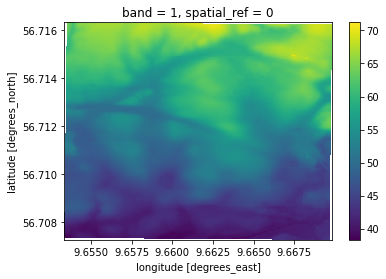

In [18]:
da = rioxarray.open_rasterio('../DEMs/denmark/data/DTM_1km_6285_540.tif')
dar = da.rio.reproject('epsg:4258')
dar.where(dar!=dar.rio.nodata).plot()

## Minimal example of failure

Posted to https://github.com/corteva/rioxarray/discussions/435

In [1]:
import rioxarray
import xarray as xr
import rasterio
print(f'{rioxarray.__version__=}')
print(f'{xr.__version__=}')
print(f'{rasterio.__version__=}')

da = rioxarray.open_rasterio('../DEMs/denmark/data/DTM_1km_6285_540.tif')
da

rioxarray.__version__='0.8.0'
xr.__version__='0.19.0'
rasterio.__version__='1.2.10'


<xarray.DataArray (band: 1, y: 2500, x: 2500)>
[6250000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.4e+05 5.4e+05 5.4e+05 ... 5.41e+05 5.41e+05
  * y            (y) float64 6.286e+06 6.286e+06 ... 6.285e+06 6.285e+06
    spatial_ref  int64 0
Attributes:
    _FillValue:    -9999.0
    scale_factor:  1.0
    add_offset:    0.0

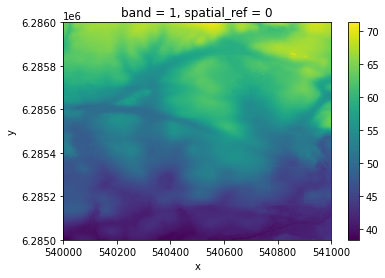

In [2]:
da.plot()

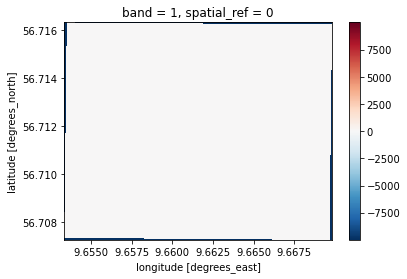

In [3]:
da.rio.reproject('epsg:4258').plot()

## Plot DK DEM data in holoviews

In [23]:
import cartopy.crs as ccrs
import geoviews as gv
import hvplot.xarray
da_dk_dem_wgs84 = rioxarray.open_rasterio(
    '../DEMs/denmark/data/DTM_1km_6285_540.tif').rio.reproject(
        'epsg:4258').where(dar!=dar.rio.nodata)
da_dk_dem_wgs84.name = 'DD_DEM'
da_dk_dem_wgs84

<xarray.DataArray 'DD_DEM' (band: 1, y: 1729, x: 3144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 9.653 9.653 9.653 9.653 ... 9.67 9.67 9.67 9.67
  * y            (y) float64 56.72 56.72 56.72 56.72 ... 56.71 56.71 56.71 56.71
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    _FillValue:    -9999.0

In [24]:
 gv.tile_sources.Wikipedia * da_dk_dem_wgs84.hvplot()

:Overlay
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .NdOverlay.I :NdOverlay   [Element]
      :Histogram   [DD_DEM]   (DD_DEM_count)